![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [4]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 marks)

In [6]:
import os
os.chdir("/content/drive/MyDrive/AIML/project_2_cv")

In [7]:
os.getcwd()

'/content/drive/MyDrive/AIML/project_2_cv'

### Extract the zip file (3 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [ ]:
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/AIML/project_2_cv/Aligned Face Dataset from Pinterest.zip","r") as z:
  z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [8]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [9]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (3 marks)
- Load one image using the function "load_image"

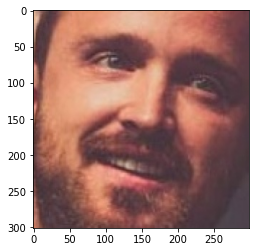

In [10]:
import matplotlib.pyplot as plt
img=load_image("/content/drive/MyDrive/AIML/project_2_cv/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg")
plt.imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (3 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [12]:
model=vgg_face()
model.load_weights('/content/drive/MyDrive/AIML/project_2_cv/vgg_face_weights.h5')

### Get vgg_face_descriptor

In [13]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [14]:
# Get embedding vector for first image in the metadata using the pre-trained model
print(metadata[0])

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector)
print(embedding_vector.shape)

PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
(224, 224, 3)
[ 0.03170307 -0.0150513  -0.01243402 ...  0.00043141  0.00219081
 -0.00908097]
(2622,)


### Generate embeddings for all images (8 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [27]:
from tqdm.notebook import tqdm
embeddings = []
embeddings = np.zeros((metadata.shape[0], 2622))

for i, meta in tqdm(enumerate(metadata)):
  try:
    image = load_image(str(meta))
    image = (image / 255.).astype(np.float32)
    image = cv2.resize(image, (224, 224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis = 0))[0]
  except:
    embeddings[i] = np.zeros(2622)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [28]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

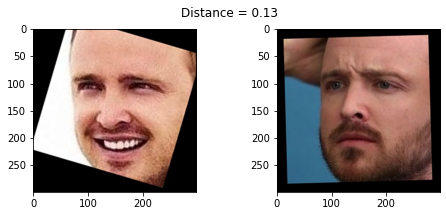

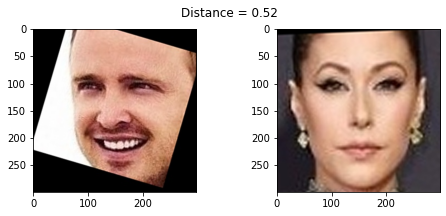

In [29]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

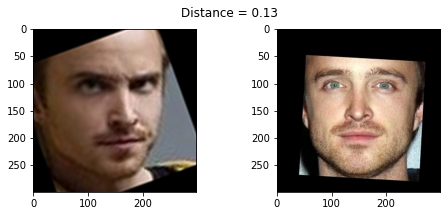

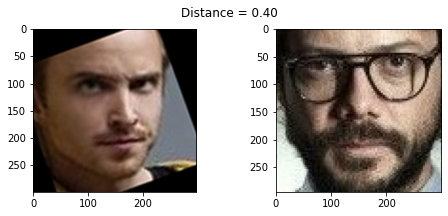

In [30]:
show_pair(30, 31)
show_pair(30, 100)

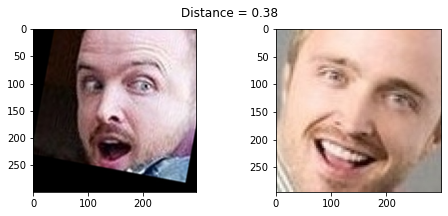

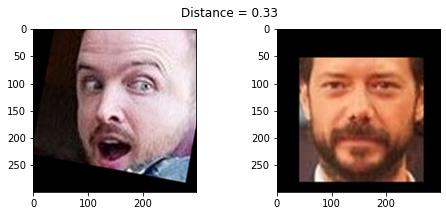

In [31]:
show_pair(70, 72)
show_pair(70,115)

### Create train and test sets (8 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [33]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]
# another half as test examples of 10 identities



targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(9573, 2622)

(9573,)

(1197, 2622)

(1197,)

### Encode the Labels (4 marks)
- Encode the targets
- Use LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder

target = np.array([m.name for m in metadata])
enc = LabelEncoder()
enc.fit(target)

y = enc.transform(target)
y_train = y[train_idx]
y_test = y[test_idx]

### Standardize the feature values (4 marks)
- Scale the features using StandardScaler

In [35]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Reduce dimensions using PCA (4 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [36]:
from sklearn.decomposition import PCA

pca = PCA() 
  
X_train = pca.fit_transform(X_train_scaled) 
X_test = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[1.35800417e-01 5.39840404e-02 3.97962402e-02 ... 1.65780493e-09
 1.63709215e-09 9.22607069e-11]


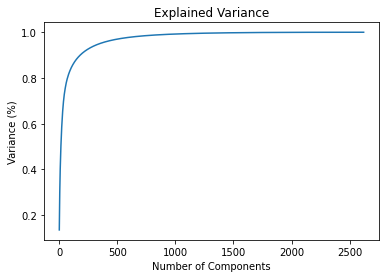

In [37]:
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [38]:
pca = PCA(n_components = 128) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[0.13580042 0.05398404 0.03979624 0.0368468  0.03401566 0.03129921
 0.02582948 0.023581   0.02105666 0.01941084 0.0181705  0.01700047
 0.01651089 0.01561569 0.01414903 0.01371875 0.01305373 0.01224419
 0.01152606 0.01134162 0.01089829 0.01056505 0.00961084 0.00937189
 0.00910852 0.00884    0.00837939 0.00767962 0.00762935 0.00732085
 0.00699369 0.00658842 0.00634042 0.00618677 0.00571339 0.00540229
 0.00529616 0.00514966 0.00504273 0.00483294 0.00441056 0.00431577
 0.00398098 0.0039344  0.00371396 0.00354625 0.00339539 0.00336069
 0.00326781 0.00317632 0.00313356 0.00308442 0.00292097 0.00283007
 0.00278612 0.00273749 0.002679   0.00262462 0.00253692 0.00249397
 0.00237733 0.00232942 0.00224872 0.00215041 0.00212653 0.00204778
 0.00201128 0.00194068 0.00188189 0.00183403 0.00182979 0.00178385
 0.00176176 0.00173161 0.00169142 0.00164813 0.00162961 0.00161844
 0.00157202 0.00155886 0.00153142 0.0014972  0.00146349 0.0014324
 0.00140884 0.00138185 0.00136377 0.00134864 0.00131351 0.00129

### Build a Classifier (4 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [39]:
from sklearn.svm import SVC

svc = SVC(C = 1.0, kernel = 'rbf', gamma = 'scale')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

print('Accuracy Score of SVC Model- ', accuracy_score(y_test, svc_pred))

Accuracy Score of SVC Model-  0.9707602339181286


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

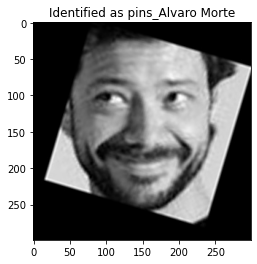

In [44]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([X_test[example_idx]])
example_identity = enc.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

